#                           Video Games Sales Analysis And Visualization

## Description 

 > . This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/)


## Fileds include 
> .Name - The games name

> . Platform - Platform of the games release (i.e. PC,PS4, etc.)

> . Year - Year of the game's release

> . Genre - Genre of the game

> . Publisher - Publisher of the game

> . NA_Sales - Sales in North America (in millions)

> . EU_Sales - Sales in Europe (in millions)

> . JP_Sales - Sales in Japan (in millions)

> . Other_Sales - Sales in the rest of the world (in millions)

> . Global_Sales - Total worldwide sales.

## Objective
> Once of the important parts of the **data analysis** process is the **Visualizations** whether were exploratory or explanatory , So in this project i will use the 2 kinds for analysis this data to understand how the data is distributed and generate insight for future decision-making
>  The data used in this project contains information only from 1980 to 2016. Below is a sketch of all the stages made in these notebooks, following a logical and intuitive sequence to facilitate the understanding of the data.

## Outline
> 1. Libraries & Data loading
> 2. Assessing Data
> 3. Cleaning Data
> 4. Exploratory analysis
> 5. Explanatory analysis

# 1. Libraries & Data loading

In [206]:
# import the libraries that i will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [207]:
# import the data
df=pd.read_csv('vgsales.csv')

In [208]:
#read count of columns and rows
df.shape

(16598, 11)

In [209]:
# read columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [210]:
# read first 20 rows of data
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [211]:
# the unique value of Publisher and count of frequency
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
T&E Soft                           1
Fuji                               1
Tripwire Interactive               1
Codemasters Online                 1
Simon & Schuster Interactive       1
Name: Publisher, Length: 579, dtype: int64

In [212]:
# Know the statistical properties for column's of data
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [213]:
# clean columns year
df.query('Year == "NaN" ')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [214]:
# see sample of data to assessing them
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13400,13402,Rock of the Dead,X360,2010,Shooter,Conspiracy Entertainment,0.04,0.00,0.00,0.00,0.05
13952,13954,Ar Nosurge: Ode to an Unborn Star,PSV,2014,Role-Playing,Tecmo Koei,0.00,0.00,0.04,0.00,0.04
939,941,inFAMOUS 2,PS3,2011,Action,Sony Computer Entertainment,1.05,0.49,0.08,0.23,1.85
13850,13852,Blood Bowl,PC,2009,Sports,Focus Home Interactive,0.01,0.02,0.00,0.01,0.04
1968,1970,Aliens vs Predator,PS3,2010,Shooter,Sega,0.41,0.47,0.00,0.18,1.05
12736,12738,Samurai Warriors 4: Empires,PS3,2015,Action,Tecmo Koei,0.00,0.00,0.06,0.00,0.06
5718,5720,Sesame Street: Elmo's Letter Adventure,PS,1998,Misc,NewKidCo,0.17,0.12,0.00,0.02,0.31
13221,13223,J-League Winning Eleven 2010: Club Championship,PS2,2010,Sports,Konami Digital Entertainment,0.00,0.00,0.05,0.00,0.05
2587,2589,Need for Speed: Hot Pursuit 2,GC,2002,Racing,Electronic Arts,0.68,0.09,0.00,0.02,0.80
11128,11130,Knights in the Nightmare,DS,2008,Role-Playing,Sting,0.06,0.00,0.02,0.00,0.09


# Clean Data 

# 2. Assessing Data

> . Year and Publisher features have missing data points. I will drop the particular rows that have missing values.   
> . Year feature has wrong data type. Therefore, I converted it to integer data type for further analysis.

# 3. Cleaning Data

In [215]:
# replace 'Nane' with np.nan on year's colunms
df=df.replace('Nane',np.nan)

In [216]:
# are there a null value on the data?
df= df.dropna(subset=['Publisher', 'Year'], axis=0)
df= df.reset_index(drop=True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [217]:
df.query('Year == "Nane"')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [218]:
# Converting float year type to int
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int32')

# Analyzing and visualizng Data


# 1. Exploratory Analysis

In [219]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(5))

(16291, 11)
Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.

## The structure of the a dataset
There are 16,598 vgsales (video game sales) in the dataset with 10 features (name , platform ,year ,genre ,publisher , na_sales ,eu_sales ,jp_sales ,other_sales ,global_sales) ,
. there 4 variable for sales in different country
## The main features of interest in the data
I'm most interest in figuring out where are higher sales and 
what are the genre have highest sales

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: global sales and oher sales.

#### Global sales

Text(0.5, 1.0, 'Distribution of Global_sales')

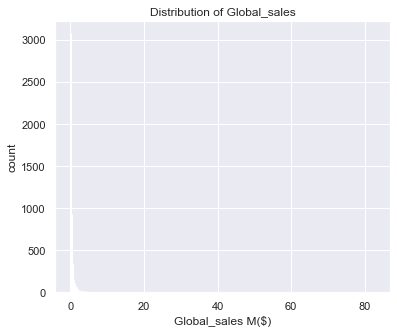

In [220]:
# create a plot for global_sales
bins = np.arange(0, df.Global_Sales.max()+0.05,0.05)
plt.figure(figsize=[6,5])
plt.hist(data=df , x='Global_Sales',bins=bins);
plt.xlabel('Global_sales M($)')
plt.ylabel('count')
plt.title('Distribution of Global_sales')


In [221]:
# knowing count of games have a sales greater than 5 m $
high_global_sales=df.query('Global_Sales > 5 ') 
high_global_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
199,201,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07
200,202,Resident Evil,PS,1996,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05
201,203,Tony Hawk's Pro Skater,PS,1999,Sports,Activision,3.42,1.38,0.02,0.20,5.02
202,204,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,Nintendo,2.59,1.06,0.80,0.57,5.02


#### There are less than 500 values ​​greater than 3 million I will use them in a separate group so we will use ```plt.xlim() ``` 

Text(0, 0.5, 'count')

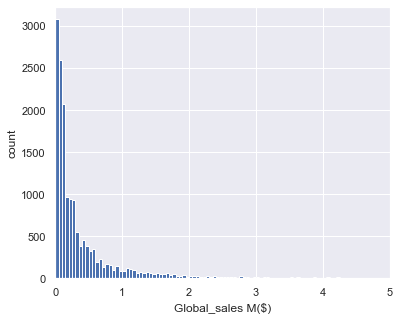

In [222]:
# create a plot of global_sales limited
bins = np.arange(0, df.Global_Sales.max()+0.05,0.05)
plt.figure(figsize=[6,5])
plt.hist(data=df , x='Global_Sales',bins=bins );
plt.xlim([0,5])
plt.xlabel('Global_sales M($)')
plt.ylabel('count')


#### Global_sales have a long tailed distribution with alot of sales between[0,0.2] million_dollar


#### create a plot for value greater than 5 m$

Text(0, 0.5, 'count')

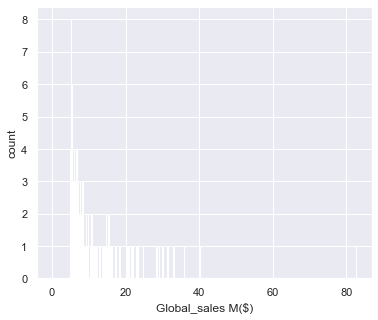

In [223]:
# create a plot for value greater than 5 m$
bins = np.arange(0, df.Global_Sales.max()+0.05,0.05)
default_color = sb.color_palette()[0]
plt.figure(figsize=[6,5])
plt.hist(data=high_global_sales , x='Global_Sales',bins=bins ,color=default_color);
plt.xlabel('Global_sales M($)')
plt.ylabel('count')

In [224]:
# knowing count of games that have sales greater than 40 m$
df.query('Global_Sales > 40')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


#### When we look to highest 500 games we can see that most of them between[5,20] million_d and there 2 games highest 40 m($)

### Most released games

In [225]:
# knowing Most released games
highest_games=df.Name.value_counts()[:20]
highest_games

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
FIFA 14                                     9
LEGO Star Wars II: The Original Trilogy     8
The LEGO Movie Videogame                    8
Terraria                                    8
FIFA Soccer 13                              8
LEGO Jurassic World                         8
FIFA 15                                     8
Monopoly                                    8
Lego Batman 3: Beyond Gotham                8
Madden NFL 08                               8
Cars                                        8
LEGO The Hobbit                             8
Madden NFL 07                               8
Angry Birds Star Wars                       8
Skylanders: SuperChargers                   7
Major League Baseball 2K11                  7
Harry Potter and the Half-Blood Prince      7
Name: Name, dtype: int64

Text(0.5, 1.0, 'Most released games')

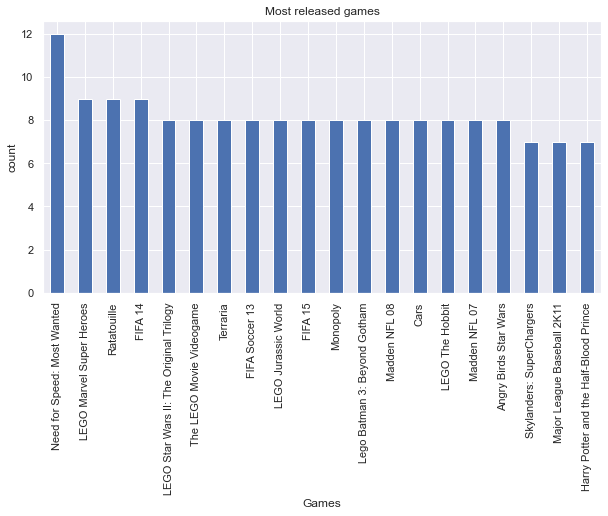

In [226]:
# plot bar for Most released games
df.Name.value_counts()[:20].plot(kind='bar' ,figsize=(10,5))
plt.xlabel('Games')
plt.ylabel('count')
plt.title('Most released games')


### #############################

## Year
### Are there years that have higher sales than others?

Text(0.5, 1.0, 'Distribution of games by the years')

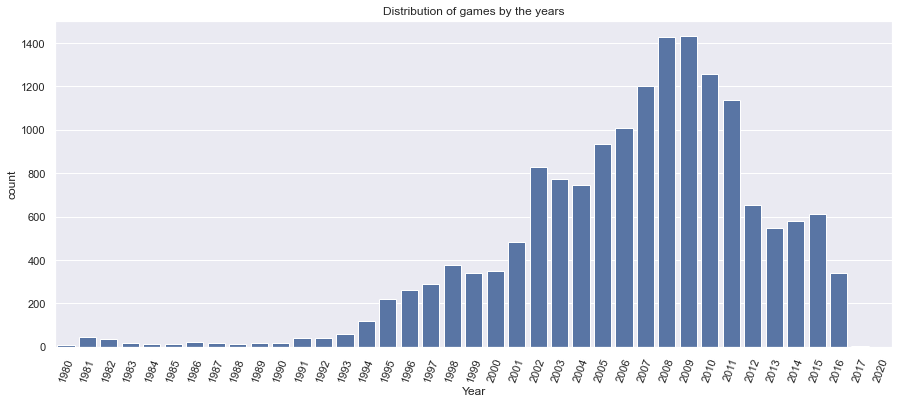

In [227]:
# create a plot for year
fig, ax = plt.subplots( figsize = [15,6])
default_color = sb.color_palette()[0]
sb.countplot(data=df ,x='Year',color=default_color );
plt.xticks(rotation=70);
plt.title('Distribution of games by the years')

#### According to the graph above, the number of games published annually is increasing significantly after the 2000s. This has the top points in the year of 2009

## Platform
#### Are there platform frequency higher than other ?

In [228]:
high_platform = df.Platform.value_counts()

Text(0.5, 1.0, 'count of games for every platform')

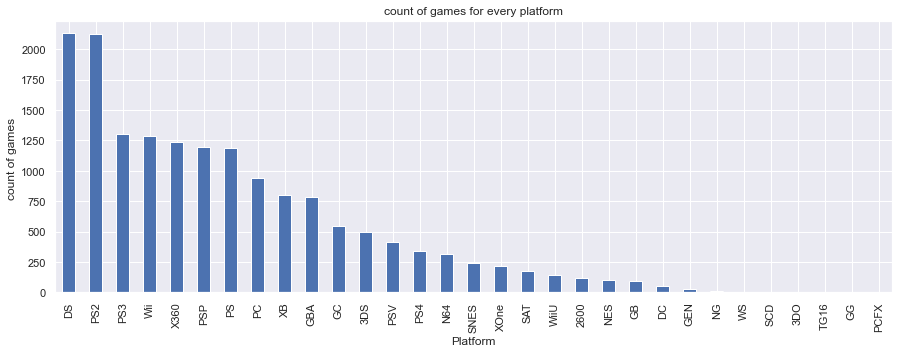

In [229]:
# create plot for Platforms
high_platform.plot(kind='bar',figsize=(15,5))
plt.xlabel('Platform')
plt.ylabel('count of games ')
plt.title('count of games for every platform')

#### two platform (DS,PS2) have the highest number of games

## Publisher
#### Are there platform frequency higher than other ? 

Text(0.5, 1.0, 'count of games for every publisher')

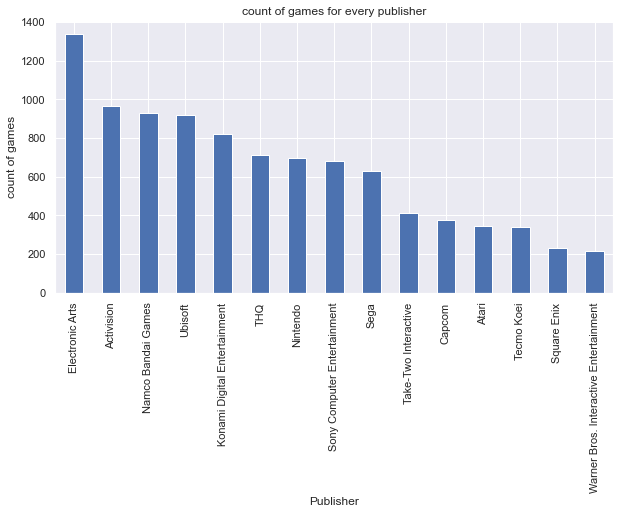

In [230]:
# Create bar plot for Publisher
df.Publisher.value_counts()[:15].plot(kind='bar',figsize=(10,5))
plt.xlabel('Publisher')
plt.ylabel('count of games')
plt.title('count of games for every publisher')

#### The publisher **Elctronic Arts ** have highest number ofgames

## Genre
#### What are the most  common Genre on world?

In [231]:
# the value counts of games genre
genre_order=df.Genre.value_counts().index

Text(0.5, 1.0, 'Genre of games video')

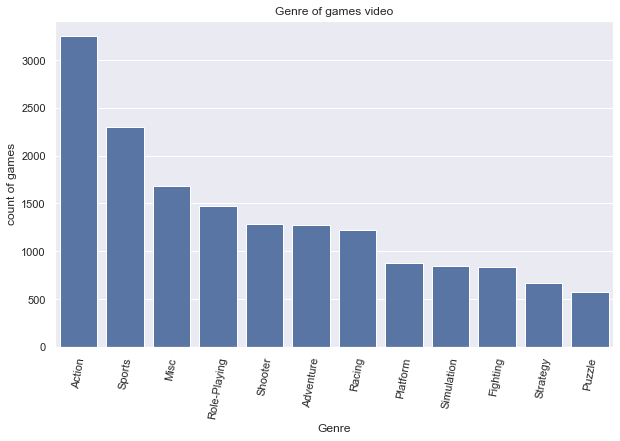

In [232]:
# create plot for knowing the most common Genre on world 
fig, ax = plt.subplots( figsize = [10,6])
base_color = sb.color_palette()[0]
sb.countplot(data=df ,x='Genre',color=base_color ,order=genre_order);
plt.xticks(rotation=80);
plt.xlabel('Genre')
plt.ylabel('count of games')
plt.title('Genre of games video')

#### (Action) is the highest genre frequency like[Grand Theft Auto V	 ,Planet Monste] after that coming (sports) like[Wii Sports	,FIFA 16]

In [233]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


## Some observation In this part (Univariate Exploration) :
#### Global_sales
> . Most of Games global_sales range between [0:3]``M$``
> . there are less than [500] games global sales are highest 3 ``M$`` most of them range between [3:20] ``M$`` , and just 2 games greater than 20 ``M$``
#### Most realease game , Year ,Genre , Platform
> 1. the number of games published annually is increasing significantly after the 2000s. This has the top points in the year of 2008 and 2009 
> 2. (Action) is the highest genre frequency like[Grand Theft Auto V ,Planet Monste] after that coming (sports) like[Wii Sports ,FIFA 16]
> 3. The publisher *Elctronic Arts * have highest number ofgames
> 4. Top games that have been released more than once [Need for Speed: Most Wanted 12 ,
LEGO Marvel Super Heroes  9 ,
Ratatouille  9 ]
> 5. two platform (DS,PS2) have the highest number of games

## Bivariate Exploration
### the main points in this part
> 1. What are the continents with the highest contributions to the global market?
> 2. the relation between years and Genre with global sales

### First i will see the correlation between the variabeles

Text(0.5, 1.0, 'the correlation between the variabeles')

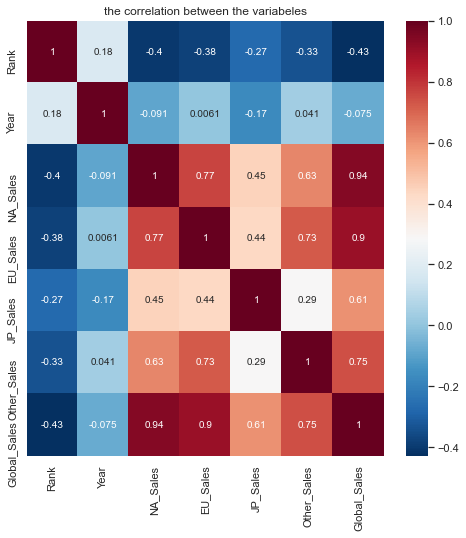

In [234]:
# see the correlation between the variables
plt.figure(figsize=(8,8))
sb.heatmap(df.corr(),annot=True,cmap='RdBu_r')
plt.title('the correlation between the variabeles')

> . Positive values shows positive correlation whereas negative values shows inverse correlation. As we can see North American sales has contributed considerably to overall Global sales;hence we can see a positive correlation between the two after that coming Europe.¶

###  Sales compearison by genre¶

In [235]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

<AxesSubplot:ylabel='Genre'>

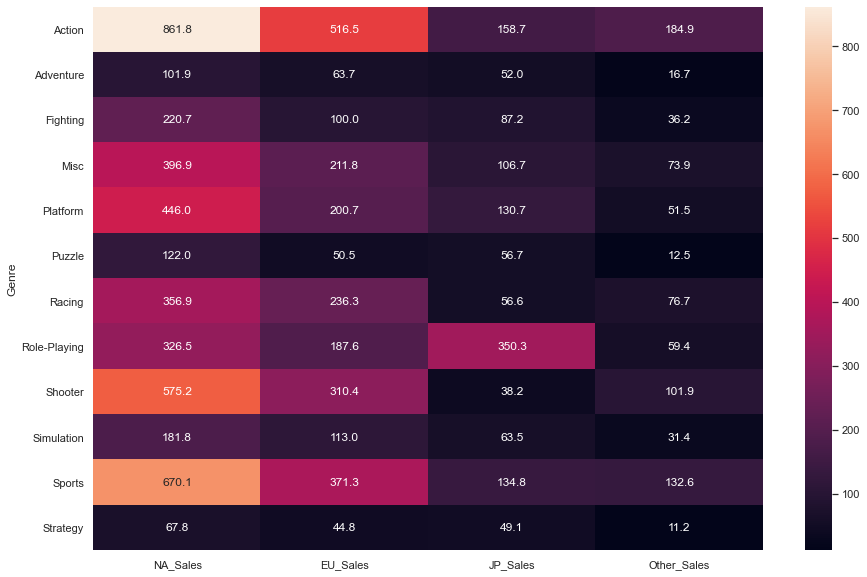

In [236]:
plt.figure(figsize=(15, 10))
sb.set(font_scale=1)
sb.heatmap(comp_map, annot=True, fmt = '.1f')

#### As expected, North America is the best seller in most genre of games, after that comes Europe
Action shooter and sports  are the highest among the genre for most continents

In [237]:
## The Relation between 

Text(0.5, 1.0, 'Relation between years and Global sales')

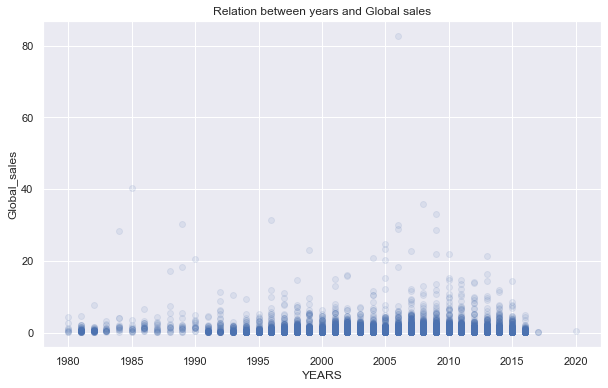

In [238]:
# create a plot for relation between years and glopal sales
fig, ax = plt.subplots( figsize = [10,6])
base_color = sb.color_palette()[0]
plt.scatter(data=df ,x='Year' ,y='Global_Sales',alpha = 1/10)
plt.xlabel('YEARS')
plt.ylabel('Global_sales')
plt.title('Relation between years and Global sales')

#### We can see that sales started to rise from 1995 to 2015 and the highest sales increase was in 2008 and 2009

####  Genre vs. global_sales

Text(0.5, 1.0, 'Relation between Genre and global_sales')

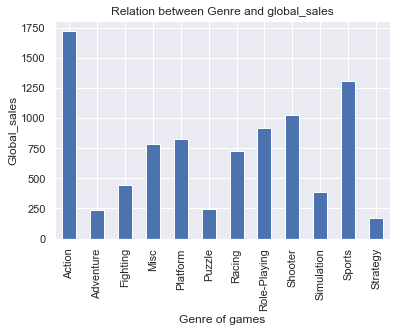

In [239]:
# create a plot for relation between genre and global_sales
df.groupby('Genre')['Global_Sales'].sum().plot(kind='bar')
plt.xlabel('Genre of games')
plt.ylabel('Global_sales')
plt.title('Relation between Genre and global_sales')

### Action shooter and sports are the highest among the genre for most continents

## The Relation between Global Sales and sales for [NA_Sale ,EU_Sales ,JP_Sales]

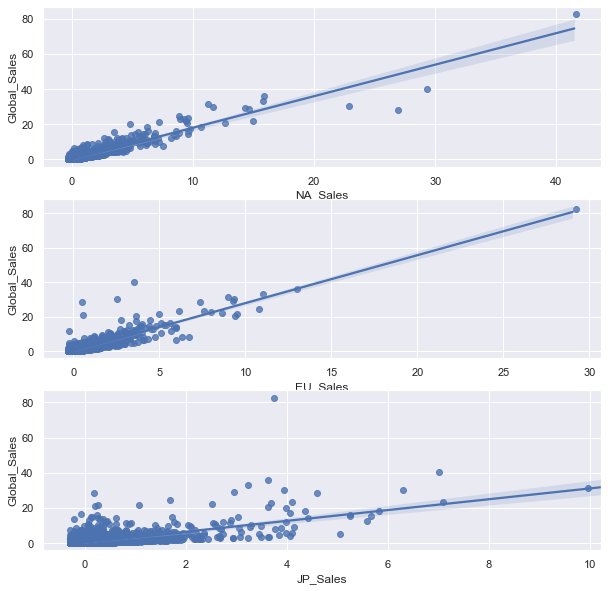

In [240]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.regplot(data = df, x = 'NA_Sales',y='Global_Sales', color = default_color, x_jitter=0.3, ax = ax[0])
sb.regplot(data = df, x = 'EU_Sales',y='Global_Sales',  color = default_color, x_jitter=0.3, ax = ax[1])
sb.regplot(data = df, x = 'JP_Sales',y='Global_Sales',  color = default_color, x_jitter=0.3, ax = ax[2])

plt.show()

#### There is a strong direct relationship between sales in [the United States , Europe ] and global sales, and a direct relationship also between Japan, but not as strong as America and Europe


### Global Sales by Market¶


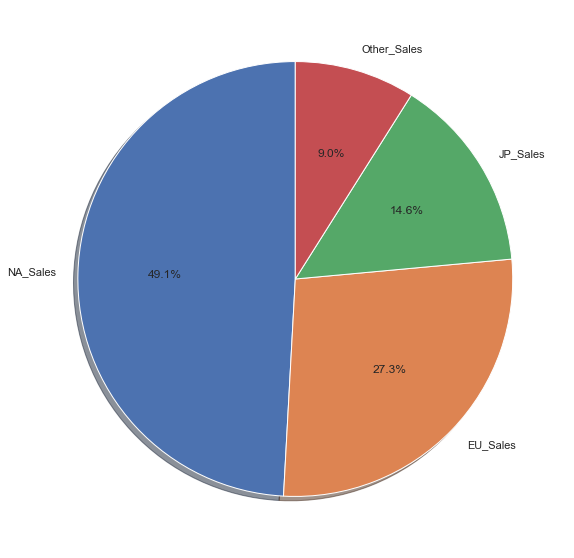

In [241]:
country_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
labels = country_list
plt.figure(figsize=(10,10))
sizes = df[country_list].sum()
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

### Unsurprisingly, North America makes up for nearly half of the world's video game sales. Nothing suprising here.

In [242]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Important observations in this section (Bivariate Exploration)
1. North America makes up for nearly half of the world's video game sales. Nothing suprising here
2. There is a strong direct relationship between sales in [the United States , Europe ] and global sales, and a direct relationship also between Japan, but not as strong as America and Europ
3. sales started to rise from 1995 to 2015 and the highest sales increase was in 2008 and 200
4. North American sales has contributed considerably to overall Global sales;hence we can see a positive correlation between the two after that coming Europe



## Multivariate Exploration
.
### The relationship between Genre of games , sales area and sales price

In [243]:
comp_genre =df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp =comp_genre.groupby('Genre').sum()

In [244]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99


Text(0.5, 1.0, 'The relationship between Genre of games , sales area and sales price')

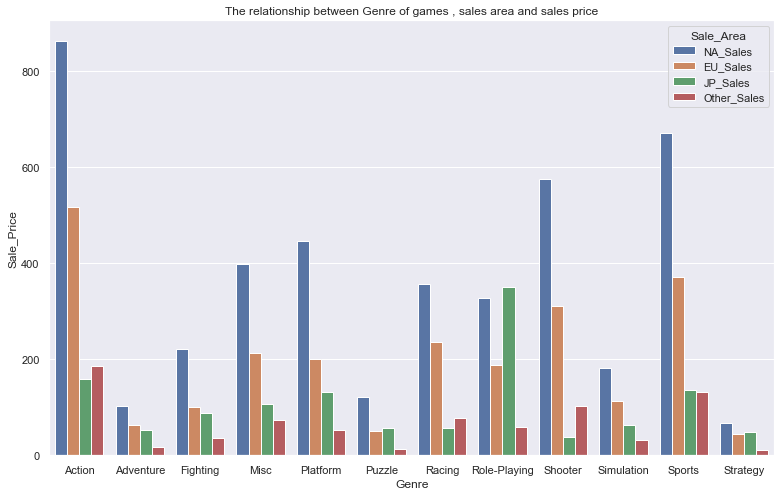

In [245]:
plt.figure(figsize=(13,8))
sb.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.title('The relationship between Genre of games , sales area and sales price')

#### Here Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time. Its look like they love video games most

###  Sales compearison by platform


In [246]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [247]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [248]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.53


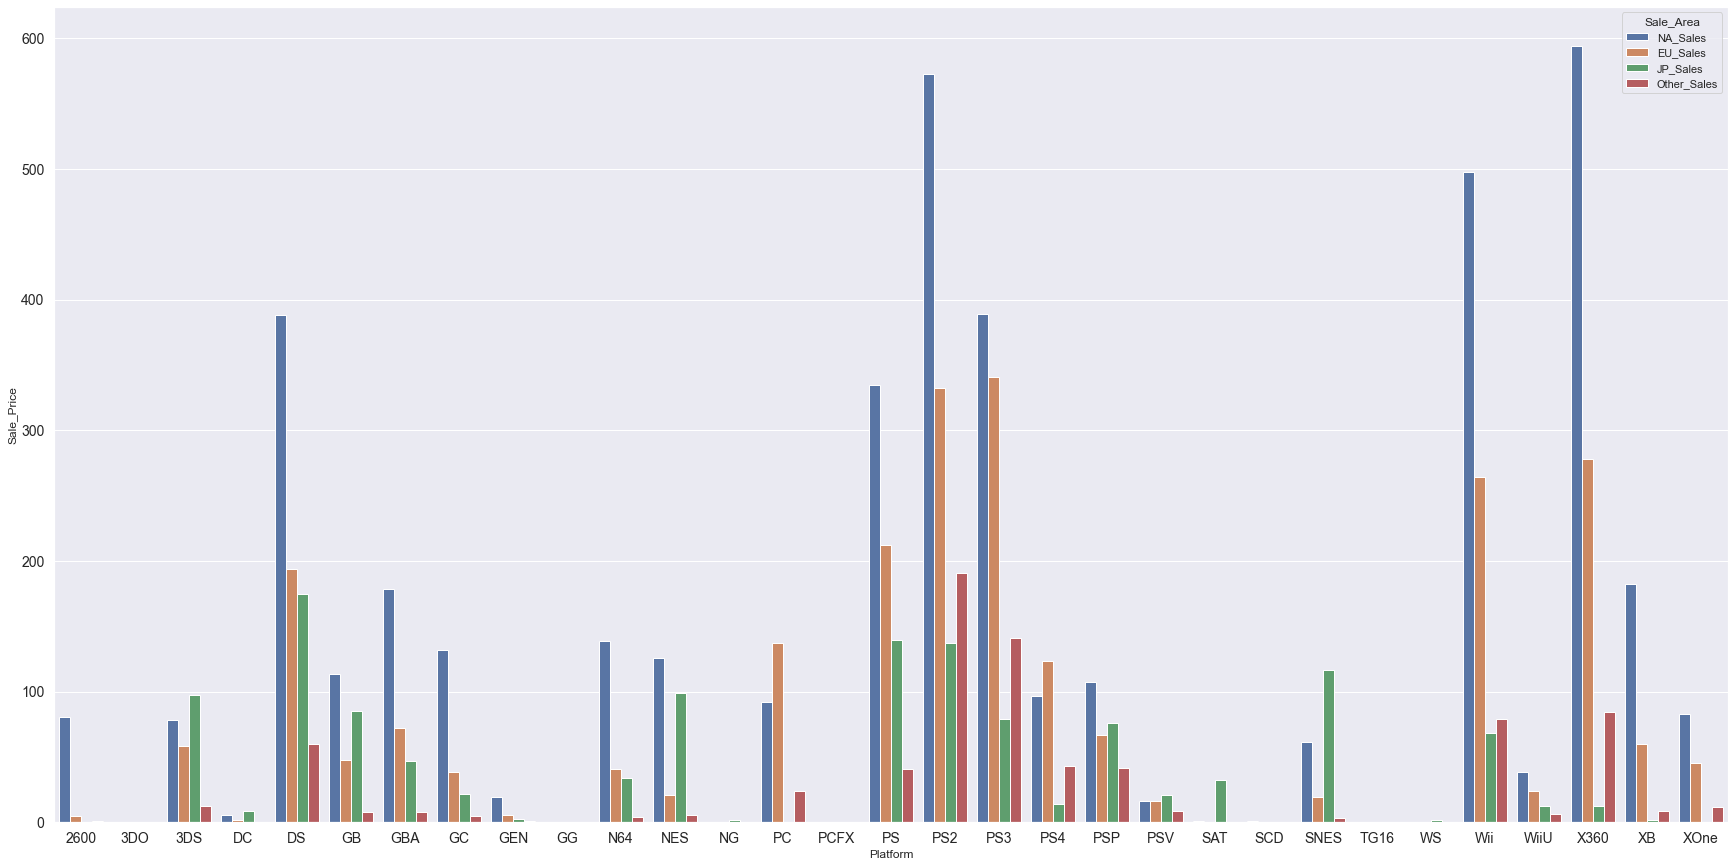

In [249]:
plt.figure(figsize=(30, 15))
sb.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  It's clearly shown that X360, Wii, and PS are market leader. and north america always top. i have a question in my mind why they play video games most

## Important observations in this section (Bivariate Exploration)
1.  Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time
2.  X360, Wii, and PS are market leader. and north america always top.
3.  North America is the best seller in most genre of games, after that comes Europe
Action shooter and sports are the highest among the genre for most continents


# The most important conclusions
1. the number of games published annually is increasing significantly after the 2000s. This has the top points in the year of 2008 and 2009

2. (Action) is the highest genre frequency like[Grand Theft Auto V ,Planet Monste] after that coming (sports) like[Wii Sports ,FIFA 16]
3. two platform (DS,PS2) have the highest number of games
4. North America makes up for nearly half of the world's video game sales. Nothing suprising here
5. There is a strong direct relationship between sales in [the United States , Europe ] and global sales, and a direct relationship also between Japan, but not as strong as America and Europ
6. Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time
7. X360, Wii, and PS are market leader. and north america always top.
8. North America is the best seller in most genre of games, after that comes Europe Action shooter and sports are the highest among the genre for most continents

# References
1. [stack_over_flow](https://stackoverflow.com/)
2. [panda ](https://pandas.pydata.org/)
3. [Kaggle](https://www.kaggle.com/gregorut/videogamesales)